# Predicting Forest Cover with Nearest Neighbors Models

### ***Yabra Muvdi***

In this project, I try to predict the class of forest cover (the predominant kind of tree cover) from strictly cartographic and environment variables. The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains categorical data for qualitative independent variables (wilderness areas and soil types). The details on the data at *covertype.info* file and at https://archive.ics.uci.edu/ml/datasets/Covertype

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
import ipywidgets
from math import floor, ceil
import random
import time
from utils.helper_functions import *

## Step 1: Read and explore data

In [17]:
data = pd.read_csv("./Data/MultiClass_Train_reduced.csv")
data

,Elevation,Aspect,Slope,Horiz_dist_hydro,Vertical_dist_hydro,Horiz_dist_roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horiz_dist_firepoints,Cover_Type,Wilderness_Area,Soil_Type
0,3202,34,10,0,0,2760,219,218,134,1734,1,3,38
1,3113,251,13,192,40,5600,191,249,195,2555,2,1,22
2,2801,77,9,510,17,1728,232,223,122,1087,2,1,12
3,3165,82,9,319,56,4890,233,225,124,1452,1,1,29
4,3048,333,11,124,31,2823,196,226,170,666,1,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61001,3255,1,13,0,0,1552,201,215,151,713,1,1,38
61002,3170,170,25,417,61,2605,229,241,128,3350,2,3,33
61003,2994,170,13,134,18,1610,229,245,146,2394,2,3,33
61004,2543,135,4,124,17,524,227,238,145,1106,3,4,6


In [18]:
data.describe()

,Elevation,Aspect,Slope,Horiz_dist_hydro,Vertical_dist_hydro,Horiz_dist_roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horiz_dist_firepoints,Cover_Type,Wilderness_Area,Soil_Type
count,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000
mean,2957.682228,156.262417,14.147346,268.863472,46.617956,2350.731338,211.899436,223.170426,142.636298,1979.518490,2.056453,2.113989,24.319739
std,280.954015,112.214845,7.541401,212.042608,58.400389,1560.176938,27.030160,19.909797,38.384800,1316.993093,1.401520,1.062734,9.511729
min,1873.000000,0.000000,0.000000,0.000000,-154.000000,0.000000,54.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2806.000000,59.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1032.000000,1.000000,1.000000,20.000000
50%,2995.000000,128.000000,13.000000,218.000000,30.000000,1989.000000,218.000000,226.000000,143.000000,1711.000000,2.000000,2.000000,29.000000
75%,3162.000000,262.000000,18.000000,384.000000,69.000000,3330.000000,231.000000,237.000000,169.000000,2552.000000,2.000000,3.000000,31.000000
max,3851.000000,360.000000,62.000000,1390.000000,592.000000,7092.000000,254.000000,254.000000,252.000000,7173.000000,7.000000,4.000000,40.000000


In [19]:
#Exploring the pressence of missing values
data.isna().sum()

Elevation                0
Aspect                   0
Slope                    0
Horiz_dist_hydro         0
Vertical_dist_hydro      0
Horiz_dist_roadways      0
Hillshade_9am            0
Hillshade_Noon           0
Hillshade_3pm            0
Horiz_dist_firepoints    0
Cover_Type               0
Wilderness_Area          0
Soil_Type                0
dtype: int64

Lets start by taking the variable to predict out of the dataset

In [20]:
y = data["Cover_Type"]  # This is the classificatoin outcome: Class of forest
X = data.drop(['Cover_Type'], axis=1) # keep only the features as explanatory variables.

In [21]:
X.describe()

,Elevation,Aspect,Slope,Horiz_dist_hydro,Vertical_dist_hydro,Horiz_dist_roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horiz_dist_firepoints,Wilderness_Area,Soil_Type
count,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000,61006.000000
mean,2957.682228,156.262417,14.147346,268.863472,46.617956,2350.731338,211.899436,223.170426,142.636298,1979.518490,2.113989,24.319739
std,280.954015,112.214845,7.541401,212.042608,58.400389,1560.176938,27.030160,19.909797,38.384800,1316.993093,1.062734,9.511729
min,1873.000000,0.000000,0.000000,0.000000,-154.000000,0.000000,54.000000,45.000000,0.000000,0.000000,1.000000,1.000000
25%,2806.000000,59.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1032.000000,1.000000,20.000000
50%,2995.000000,128.000000,13.000000,218.000000,30.000000,1989.000000,218.000000,226.000000,143.000000,1711.000000,2.000000,29.000000
75%,3162.000000,262.000000,18.000000,384.000000,69.000000,3330.000000,231.000000,237.000000,169.000000,2552.000000,3.000000,31.000000
max,3851.000000,360.000000,62.000000,1390.000000,592.000000,7092.000000,254.000000,254.000000,252.000000,7173.000000,4.000000,40.000000


## Step 2: Create dummies for relevant features or build adhoc function

In this step I will separate my data set into two; one with all the categorical features, and one with all the continous ones. This will make it easier to create the relevant dummy features using the OneHotEncoder.

In [22]:
# Genereate a dataset with the non categorical/continous features of the data set
X_cont = X.drop(['Wilderness_Area', 'Soil_Type'], axis=1)
X_cont

,Elevation,Aspect,Slope,Horiz_dist_hydro,Vertical_dist_hydro,Horiz_dist_roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horiz_dist_firepoints
0,3202,34,10,0,0,2760,219,218,134,1734
1,3113,251,13,192,40,5600,191,249,195,2555
2,2801,77,9,510,17,1728,232,223,122,1087
3,3165,82,9,319,56,4890,233,225,124,1452
4,3048,333,11,124,31,2823,196,226,170,666
...,...,...,...,...,...,...,...,...,...,...
61001,3255,1,13,0,0,1552,201,215,151,713
61002,3170,170,25,417,61,2605,229,241,128,3350
61003,2994,170,13,134,18,1610,229,245,146,2394
61004,2543,135,4,124,17,524,227,238,145,1106


In [23]:
# Generate a dataset with the categorical features only
X_cat = X[['Wilderness_Area','Soil_Type']].copy()
X_cat

,Wilderness_Area,Soil_Type
0,3,38
1,1,22
2,1,12
3,1,29
4,1,23
...,...,...
61001,1,38
61002,3,33
61003,3,33
61004,4,6


In [24]:
wild_dum = pd.get_dummies(X_cat.Wilderness_Area, drop_first = True)
wild_dum.columns = ['Neota','Comanche', 'Cache']
wild_dum

,Neota,Comanche,Cache
0,0,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
61001,0,0,0
61002,0,1,0
61003,0,1,0
61004,0,0,1


In [25]:
#I am going to give the new dummies variables I prefix so that I can access them later
soil_dum = pd.get_dummies(X_cat.Soil_Type, prefix = 'soil',drop_first = True)
soil_dum

,soil_2,soil_3,soil_4,soil_5,soil_6,soil_7,soil_8,soil_9,soil_10,soil_11,...,soil_31,soil_32,soil_33,soil_34,soil_35,soil_36,soil_37,soil_38,soil_39,soil_40
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
61002,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
61003,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
61004,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
X_cat_dum = wild_dum.join(soil_dum)

This problem can also be approached using sklearn and its OneHotEncoder

In [27]:
#Preprocessing from sklearn
#from sklearn import preprocessing
#one_hot_enc = preprocessing.OneHotEncoder()
#X_cat = pd.DataFrame(one_hot_enc.fit_transform(X_cat).toarray())
#X_dummies = X_cont.join(X_cat)

Re-combining the datasets

In [28]:
X_dummies = X_cont.join(X_cat_dum)

In [29]:
X_dummies

,Elevation,Aspect,Slope,Horiz_dist_hydro,Vertical_dist_hydro,Horiz_dist_roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horiz_dist_firepoints,...,soil_31,soil_32,soil_33,soil_34,soil_35,soil_36,soil_37,soil_38,soil_39,soil_40
0,3202,34,10,0,0,2760,219,218,134,1734,...,0,0,0,0,0,0,0,1,0,0
1,3113,251,13,192,40,5600,191,249,195,2555,...,0,0,0,0,0,0,0,0,0,0
2,2801,77,9,510,17,1728,232,223,122,1087,...,0,0,0,0,0,0,0,0,0,0
3,3165,82,9,319,56,4890,233,225,124,1452,...,0,0,0,0,0,0,0,0,0,0
4,3048,333,11,124,31,2823,196,226,170,666,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61001,3255,1,13,0,0,1552,201,215,151,713,...,0,0,0,0,0,0,0,1,0,0
61002,3170,170,25,417,61,2605,229,241,128,3350,...,0,0,1,0,0,0,0,0,0,0
61003,2994,170,13,134,18,1610,229,245,146,2394,...,0,0,1,0,0,0,0,0,0,0
61004,2543,135,4,124,17,524,227,238,145,1106,...,0,0,0,0,0,0,0,0,0,0


## Step 3: Build a single class model (for class # 7)

Lets start by dividing our whole data set into a test and a training set in order to perform cross-validation later.

In [30]:
#Training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, random_state=92)

Now, we should create a **y** variable that only shows if a forest is class 7 or not.

In [31]:
y_7 = pd.get_dummies(y)[7]
y_7_train = pd.get_dummies(y_train)[7]
y_7_test = pd.get_dummies(y_test)[7]

Before proceding any further we should rescale our features in order to for them to have a commom mean and variance

In [32]:
# I want to save this object 'scaler' because I want to use the same one for both the training and the test data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

X_train=pd.DataFrame(X_train, columns=X_dummies.columns)
X_test=pd.DataFrame(X_test, columns=X_dummies.columns)

In [33]:
X_train.describe()

,Elevation,Aspect,Slope,Horiz_dist_hydro,Vertical_dist_hydro,Horiz_dist_roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horiz_dist_firepoints,...,soil_31,soil_32,soil_33,soil_34,soil_35,soil_36,soil_37,soil_38,soil_39,soil_40
count,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,...,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04,4.575400e+04
mean,-7.345515e-16,-2.981689e-17,3.785348e-17,-6.988334e-17,-1.894615e-17,-1.188017e-16,4.391780e-16,2.338762e-16,-3.135432e-16,2.329445e-19,...,-2.795334e-17,7.578460e-17,4.565712e-17,-4.379356e-17,4.503593e-18,-6.211852e-18,4.658889e-18,-5.155837e-17,1.708259e-17,5.093719e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-3.857424e+00,-1.392601e+00,-1.884201e+00,-1.269371e+00,-3.437989e+00,-1.505327e+00,-5.718100e+00,-7.114132e+00,-3.717809e+00,-1.504321e+00,...,-2.141902e-01,-3.152880e-01,-2.908669e-01,-5.579620e-02,-5.419694e-02,-1.322417e-02,-1.870344e-02,-1.641146e-01,-1.584076e-01,-1.210727e-01
25%,-5.366756e-01,-8.663449e-01,-6.853951e-01,-7.582694e-01,-6.771781e-01,-7.990982e-01,-5.207036e-01,-5.129665e-01,-6.133576e-01,-7.196235e-01,...,-2.141902e-01,-3.152880e-01,-2.908669e-01,-5.579620e-02,-5.419694e-02,-1.322417e-02,-1.870344e-02,-1.641146e-01,-1.584076e-01,-1.210727e-01
50%,1.360162e-01,-2.598128e-01,-1.525924e-01,-2.377028e-01,-2.827765e-01,-2.314207e-01,2.217816e-01,1.421110e-01,1.275027e-02,-2.013123e-01,...,-2.141902e-01,-3.152880e-01,-2.908669e-01,-5.579620e-02,-5.419694e-02,-1.322417e-02,-1.870344e-02,-1.641146e-01,-1.584076e-01,-1.210727e-01
75%,7.268461e-01,9.443318e-01,5.134110e-01,5.384147e-01,3.859914e-01,6.236234e-01,7.043970e-01,6.964074e-01,6.910338e-01,4.364920e-01,...,-2.141902e-01,-3.152880e-01,-2.908669e-01,-5.579620e-02,-5.419694e-02,-1.322417e-02,-1.870344e-02,-1.641146e-01,-1.584076e-01,-1.210727e-01
max,3.161350e+00,1.818452e+00,5.175435e+00,5.308698e+00,9.354341e+00,3.037375e+00,1.558255e+00,1.553047e+00,2.856324e+00,3.907883e+00,...,4.668748e+00,3.171704e+00,3.437999e+00,1.792237e+01,1.845123e+01,7.561911e+01,5.346611e+01,6.093302e+00,6.312827e+00,8.259501e+00


**Now it is time to train the model!**

In [34]:
# Load K-NN from sklearn
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 

#Initialize the KNN Classifier for class 7 with some initial reasonable parameters
KNN_7 = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

#Train the model
KNN_7.fit(X_train,y_7_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## Step 4: Build a multiclass model 

In [35]:
#Initialize the KNN Classifier for all classes with some initial reasonable parameters
KNN_comp = KNeighborsClassifier(n_neighbors=5, weights = 'distance')

#Train the model
KNN_comp.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

## Step 5: Assess expected accuracy 

As metrics, besides global accuracy, include the estimation of missclassification probabilities by class report accuracies of class #7 compared to the binary model

In [106]:
#Accuracy of the single class model
y_7_pred_acc = KNN_7.predict(X_test)

#Accuracy metrics from Sklearn
from sklearn.metrics import (accuracy_score,recall_score,precision_score,f1_score, 
                             confusion_matrix, roc_auc_score, classification_report)

print('Accuracy Score : ' + str(accuracy_score(y_7_test,y_7_pred_acc)))
print('Precision Score : ' + str(precision_score(y_7_test,y_7_pred_acc)))
print('Recall Score : ' + str(recall_score(y_7_test,y_7_pred_acc)))
print('F1 Score : ' + str(f1_score(y_7_test,y_7_pred_acc)))
print('ROC-AUC : ' + str(roc_auc_score(y_7_test,y_7_pred_acc)))


conf_mat_7 = confusion_matrix(y_7_test,y_7_pred_acc)
print('Confusion Matrix : \n ' + str(conf_mat_7))

Accuracy Score : 0.9893128769997377
Precision Score : 0.8637200736648251
Recall Score : 0.8405017921146953
F1 Score : 0.8519527702089009
ROC-AUC : 0.9177328614854136
Confusion Matrix : 
 [[14620    74]
 [   89   469]]


In [111]:
#Accuracy of the multiclass model when predicting multiple classes
y_pred_acc = KNN_comp.predict(X_test)

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
conf_mat = confusion_matrix(y_test,y_pred_acc)
print('\n Confusion Matrix : \n \n' + str(conf_mat))
report = classification_report(y_test, y_pred_acc, target_names = ['1','2','3','4','5','6','7'])
print('\n Classification Report: \n \n:' + report)

Accuracy Score : 0.8539207972724888

 Confusion Matrix : 
 
[[4688  798    3    0   16    4   71]
 [ 624 6649   49    0   44   56    6]
 [   2   46  761   13    6   99    0]
 [   0    1   21   47    0    2    0]
 [  13   79    9    0  142    0    0]
 [   4   58  111    5    0  267    0]
 [  74   13    0    0    1    0  470]]

 Classification Report: 
 
:              precision    recall  f1-score   support

           1       0.87      0.84      0.85      5580
           2       0.87      0.90      0.88      7428
           3       0.80      0.82      0.81       927
           4       0.72      0.66      0.69        71
           5       0.68      0.58      0.63       243
           6       0.62      0.60      0.61       445
           7       0.86      0.84      0.85       558

    accuracy                           0.85     15252
   macro avg       0.77      0.75      0.76     15252
weighted avg       0.85      0.85      0.85     15252



### A first model comparisson

In [122]:
df_comp = pd.DataFrame({'Precision': [0.86, 0.86], 'Recall': [0.84,0.84], 'F1-score': [0.85,0.85]}, 
                      index = ['One Class Model', 'Multi Class Model'])

In [127]:
print('Rounding all results to two decimal places, at this stage both models have \n a similar performance on the metrics considered \n \n')
print(df_comp)

Rounding all results to two decimal places, at this stage both models have 
 a similar performance on the metrics considered 
 

                   Precision  Recall  F1-score
One Class Model         0.86    0.84      0.85
Multi Class Model       0.86    0.84      0.85


### Fine tuning the parameters of the models with Grid Search

Until this point we have using fixed parameters (*k = 5* and using *distance* as a weight). Let's now perform a Grid Search to find the best parameters for our models. We start with the **One Class Model**

In [145]:
#Grid Search for one class model
from sklearn.model_selection import GridSearchCV, StratifiedKFold

grid_values = {'n_neighbors':[1,5,7,10],'weights':['uniform','distance'] } 

#Perform GridSearch CV with stratification and using 'roc_auc' as the scoring metric
grid_knn_7_acc = GridSearchCV(KNN_7, param_grid = grid_values, scoring = 'roc_auc', 
                              cv = StratifiedKFold(n_splits = 5, shuffle=True))

# I use all my data for the GridSearch because the function is taking care of train/test while performing CV
grid_knn_7_acc.fit(X_dummies, y_7)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

best parameters: {'n_neighbors': 10, 'weights': 'distance'}
best score:      0.99169 (+/-0.00238)


,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.989870,0.990883,0.994443,0.994533,0.988737,0.991693,0.002381,1
6,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.988563,0.989605,0.992784,0.993070,0.987202,0.990245,0.002321,2
5,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.987971,0.985518,0.992758,0.992490,0.984617,0.988671,0.003410,3
4,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.987108,0.984612,0.991725,0.991403,0.983651,0.987700,0.003352,4
3,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.983635,0.983472,0.987330,0.991676,0.982587,0.985740,0.003385,5
2,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.982934,0.982800,0.986599,0.990928,0.981894,0.985031,0.003360,6
0,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.946465,0.951941,0.951466,0.955689,0.954234,0.951959,0.003147,7
1,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.946465,0.951941,0.951466,0.955689,0.954234,0.951959,0.003147,7


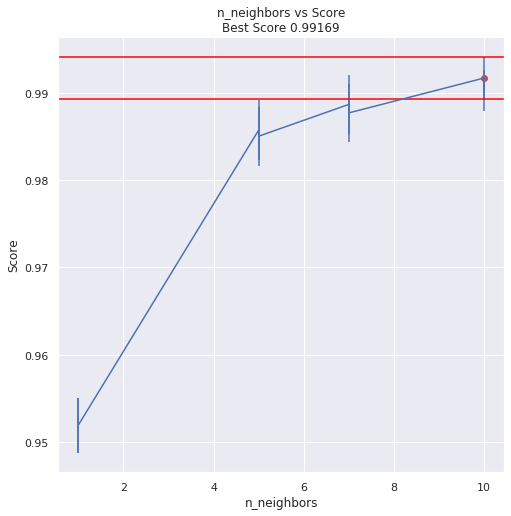

Best k parameter : 10
Best weights parameter : distance


In [146]:
# Report best parameters and the accuracy of the model with the best parameters
GridSearch_table_plot(grid_knn_7_acc, "n_neighbors", negative=False, display_all_params=False)
print('Best k parameter : '+ str(grid_knn_7_acc.best_estimator_.n_neighbors))
print('Best weights parameter : '+ str(grid_knn_7_acc.best_estimator_.weights))

Now, lets do the same for the multiclass model

In [147]:
#Grid Search for one class model
from sklearn.model_selection import GridSearchCV

grid_values = {'n_neighbors':[1,5,7,10],'weights':['uniform','distance'] } 

#Lets use a different scoring metric to try to account for the imbalance in classes
grid_knn_acc = GridSearchCV(KNN_7, param_grid = grid_values, scoring = 'f1_weighted',
                           cv = StratifiedKFold(n_splits = 5, shuffle=True))

grid_knn_acc.fit(X_dummies, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 5, 7, 10],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

best parameters: {'n_neighbors': 1, 'weights': 'uniform'}
best score:      0.90396 (+/-0.00311)


,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.908306,0.906437,0.903957,0.900564,0.900514,0.903956,0.003112,1
1,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.908306,0.906437,0.903957,0.900564,0.900514,0.903956,0.003112,1
3,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.891070,0.888760,0.890514,0.884587,0.883188,0.887624,0.003175,3
5,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.886415,0.882131,0.886104,0.880938,0.879445,0.883007,0.002791,4
7,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.874144,0.872879,0.876136,0.872209,0.872973,0.873668,0.001382,5
2,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.870321,0.870707,0.870467,0.864875,0.863993,0.868073,0.002987,6
4,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.858018,0.856836,0.858437,0.853885,0.854660,0.856367,0.001806,7
6,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.838427,0.837429,0.840065,0.836371,0.836036,0.837666,0.001465,8


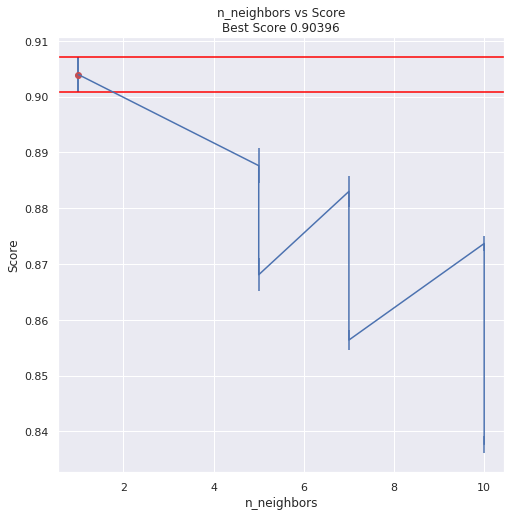

Best k parameter : 1
Best weights parameter : uniform


In [148]:
# Report best parameters and the accuracy of the model with the best parameters
GridSearch_table_plot(grid_knn_acc, "n_neighbors", negative=False, display_all_params=False)
print('Best k parameter : '+ str(grid_knn_acc.best_estimator_.n_neighbors))
print('Best weights parameter : '+ str(grid_knn_acc.best_estimator_.weights))

At this stage the best model seems:

1. Single Class Classifier: K = 10, Weights = Distance
2. Multi Class Classifier: K = 1, Weights = Uniform

## Step 5B: Improving the measure of distance

Lets create a new measurre of distance that takes into account that we have both dummy and continous variables. This could help us create a better model.

In [69]:
from scipy.spatial import distance
def compound_distance(s1, s2):
    
    """Calculates a distance composed of: 
    1. Weighted Hamming Distance for categorical variables
    2. Regular distance for continous variables
    """
    if len(s1) != len(s2):
        raise ValueError("Undefined for sequences of unequal length")
    
    num_cont = X_cont.shape[1]
    num_cat = X_cat_dum.shape[1]
    
    # We are relying on the order in which we constructed the final matrix of features
    cont_dist = distance.minkowski(s1[0:num_cont],s2[0:num_cont])
    cat_dist = distance.hamming(s1[num_cont:num_cat],s2[num_cont:num_cat])
        
    return (cont_dist + cat_dist)

## Step 5C: Final Grid Search to test new measures of distance

In [70]:
#Grid Search for one class model
from sklearn.model_selection import GridSearchCV

# I am going to use the optimal parameters found previously to compare two measures of distance
grid_values_final = {'n_neighbors':[10],'weights':['distance'], 
                     'metric': ['minkowski', lambda X, Y: compound_distance(X, Y)]} 

grid_knn_7_acc_final = GridSearchCV(KNN_7, param_grid = grid_values_final, scoring = 'roc_auc', 
                                    cv = StratifiedKFold(n_splits = 5, shuffle=True))
grid_knn_7_acc_final.fit(X_dummies, y_7)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['minkowski',
                                    <function <lambda> at 0x7fe70edd90d0>],
                         'n_neighbors': [10], 'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

best parameters: {'metric': <function <lambda> at 0x7fe70edd90d0>, 'n_neighbors': 10, 'weights': 'distance'}
best score:      0.99279 (+/-0.00390)


,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,<function <lambda> at 0x7fe70edd90d0>,10,distance,{'metric': <function <lambda> at 0x7fe70edd90d...,0.985637,0.994642,0.99441,0.99708,0.992177,0.992789,0.003899,1
0,minkowski,10,distance,"{'metric': 'minkowski', 'n_neighbors': 10, 'we...",0.985634,0.994635,0.99441,0.99708,0.992176,0.992787,0.003899,2


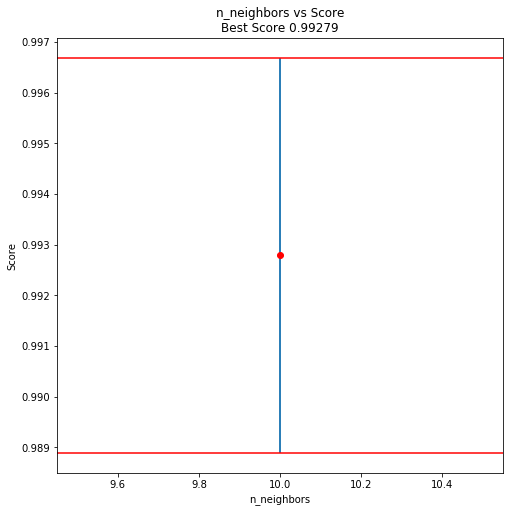

Best k parameter : 10
Best weights parameter : distance


In [71]:
# Report best paramters
GridSearch_table_plot(grid_knn_7_acc_final, "n_neighbors", negative=False, display_all_params=False)
print('Best k parameter : '+ str(grid_knn_7_acc_final.best_estimator_.n_neighbors))
print('Best weights parameter : '+ str(grid_knn_7_acc_final.best_estimator_.weights))

The GridSearch shows that both measures of distance used have really similar performance. Given that using my custom distance is orders of magnitude slower than using *distance* I am going to prefer using the later

In [74]:
#Initialize the best One Class KNN Classifier with the optimal parameters 
opt_KNN_7 = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')

#Train the model
opt_KNN_7.fit(X_dummies , y_7)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [75]:
# save the model with optimal paramaters
import pickle
filename = 'single_class_KNN.sav'
pickle.dump(opt_KNN_7, open(filename, 'wb'))

Now, lets do the same for the multiclass model

In [76]:
#Grid Search for multiclass class model
from sklearn.model_selection import GridSearchCV

grid_values_final = {'n_neighbors':[1],'weights':['distance'], 
                     'metric': ['minkowski', lambda X, Y: compound_distance(X, Y)]} 

grid_knn_acc_final = GridSearchCV(KNN_comp, param_grid = grid_values_final, scoring = 'f1_weighted', 
                                  cv = StratifiedKFold(n_splits = 5, shuffle=True))
grid_knn_acc_final.fit(X_dummies, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['minkowski',
                                    <function <lambda> at 0x7fe70eceed90>],
                         'n_neighbors': [1], 'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

best parameters: {'metric': <function <lambda> at 0x7fe70eceed90>, 'n_neighbors': 1, 'weights': 'distance'}
best score:      0.90237 (+/-0.00249)


,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,<function <lambda> at 0x7fe70eceed90>,1,distance,{'metric': <function <lambda> at 0x7fe70eceed9...,0.899698,0.899632,0.903513,0.906243,0.902767,0.902371,0.002494,1
0,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.899618,0.899551,0.903513,0.906243,0.902767,0.902338,0.002529,2


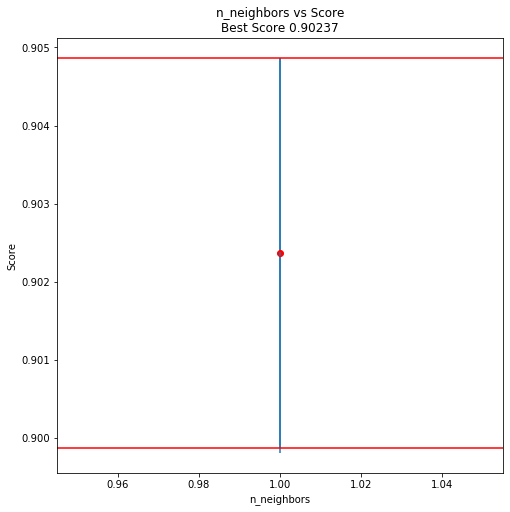

Best k parameter : 1
Best weights parameter : distance


In [77]:
# Report best parameters
GridSearch_table_plot(grid_knn_acc_final, "n_neighbors", negative=False, display_all_params=False)
print('Best k parameter : '+ str(grid_knn_acc_final.best_estimator_.n_neighbors))
print('Best weights parameter : '+ str(grid_knn_acc_final.best_estimator_.weights))

The GridSearch shows that both measures of distance used have really similar performance. **Given that using my custom distance is orders of magnitude slower** than using regular *distance* I am going to prefer using the later

In [78]:
#Initialize the Multiclass KNN Classifier with the optimal parameters 
opt_KNN_multi = KNeighborsClassifier(n_neighbors = 1, weights = 'distance')

#Train the model
opt_KNN_multi.fit(X_dummies , y_7)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [79]:
# save the model with optimal paramaters
import pickle
filename = 'multi_class_KNN.sav'
pickle.dump(opt_KNN_multi, open(filename, 'wb'))

## Step 6: Prepare code to run and check performance of you model to predict any class using a new input data 

Prepare the code to *run* on a new input file and be able to report accuracy to predict any class, following same preparation steps (missing data, dummies, etc)--

In [53]:
def generate_dummies(input_file):
    """This funcion takes an input file, loads its data, separates it into 
    the variable to predict (Y) and its features (X's) and generates the
    required dummy features.
    
    Warning: This function will only work if the column names in the provided
    input file as the same as the ones used for training.
    """
    
    import pandas as pd
    data = pd.read_csv(input_file)
    
    # Delete rows with missing values
    data = data.dropna(axis = 0)
    
    # Split X's and the Y
    y = data["Cover_Type"]  # This is the classificatoin outcome: Class of forest
    X = data.drop(['Cover_Type'], axis=1)
    
    # Preprocessing the features
    X_cont = X.drop(['Wilderness_Area', 'Soil_Type'], axis=1)
    
    wild_dum = pd.get_dummies(X.Wilderness_Area, drop_first = True)
    wild_dum.columns = ['Neota','Comanche', 'Cache']
    
    soil_dum = pd.get_dummies(X.Soil_Type, prefix = "soil", drop_first = True)
    
    X_cat = wild_dum.join(soil_dum)
    X_final = X_cont.join(X_cat) 
    
    return X_final, y
    

In [39]:
def scaling_features(X, scaler = None):
    """ This function takes an arrange of features (X) and rescales them using the scaler provider.
    The scaler provided should be the one used to train the model. If not provided then a new scaler
    will be initialized and applied to the data.
    """
    import sklearn
    
    if scaler is None:
        from sklearn import preprocessing
        scaler = preprocessing.StandardScaler().fit(X)
        X_scale = scaler.transform(X)
        print("NO SCALER PROVIDED. Used a DIFFERENT scaler")
        
    else:
        X_scale = scaler.transform(X)
        print("Used the scaler provided")
    
    return X_scale

In [58]:
def single_class_performance(classifier, X_test, y_test):
    """ This function generates predictions for the single class model and reports on its performance
    """
    
    #Define a new Y only for the class of interest
    y_one_class = pd.get_dummies(y_test)[7]
    
    #Generate predictions
    y_pred = classifier.predict(X_test)
    
    #Accuracy metrics for single class models
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, roc_auc_score

    print('Accuracy Score : ' + str(accuracy_score(y_one_class,y_pred)))
    print('Precision Score : ' + str(precision_score(y_one_class,y_pred)))
    print('Recall Score : ' + str(recall_score(y_one_class, y_pred)))
    print('F1 Score : ' + str(f1_score(y_one_class, y_pred)))
    print('ROC-AUC : ' + str(roc_auc_score(y_one_class,y_pred)))


    conf_mat_sing = confusion_matrix(y_one_class,y_pred)
    print('Confusion Matrix : \n ' + str(conf_mat_sing))

In [57]:
def multiclass_performance(classifier, X_test,y_test):
    """ This function generates predictions for the multiclass model and reports on its performance
    """
    
    #Generate predictions
    y_pred = classifier.predict(X_test)
    
    #Accuracy metrics for single class models
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

    print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
    conf_mat_mult = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix : \n ' + str(conf_mat_mult))
    report = classification_report(y_test, y_pred, target_names = ['1','2','3','4','5','6','7'])
    print('\n Classification Report: \n \n:' + report)

## Step 7: Use the newly created functions to report accuracy on the test data
Using the functions we have created let's try to load the last test data provided and report on the performance of the tuned models

In [54]:
X_final, y_final = generate_dummies("Data/MultiClass_Test_1_reduced.csv")

In [56]:
X_final = scaling_features(X_final, scaler)

In [60]:
# Load the single class model from disk and use it
import pickle
filename = 'single_class_KNN.sav'
KNN_7 = pickle.load(open(filename, 'rb'))
KNN_7

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [64]:
single_class_performance(KNN_7, X_final, y_final)

Accuracy Score : 0.9909737627170504
Precision Score : 0.8792270531400966
Recall Score : 0.8425925925925926
F1 Score : 0.8605200945626479
ROC-AUC : 0.9193186046579765
Confusion Matrix : 
 [[12591    50]
 [   68   364]]


In [65]:
# Load the multi class model from disk and use it
import pickle
filename = 'multi_class_KNN.sav'
KNN_comp = pickle.load(open(filename, 'rb'))
KNN_comp

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [67]:
multiclass_performance(KNN_comp, X_final, y_final)

Accuracy Score : 0.8473189015528187
Confusion Matrix : 
 [[3978  726    0    0   10    7   45]
 [ 584 5716   30    0   55   49   10]
 [   2   59  613   11    1   82    0]
 [   0    1   15   43    0    4    0]
 [   8   80    5    0  105    0    0]
 [   3   40   95    5    1  258    0]
 [  59    9    0    0    0    0  364]]

 Classification Report: 
 
:              precision    recall  f1-score   support

           1       0.86      0.83      0.85      4766
           2       0.86      0.89      0.87      6444
           3       0.81      0.80      0.80       768
           4       0.73      0.68      0.70        63
           5       0.61      0.53      0.57       198
           6       0.65      0.64      0.64       402
           7       0.87      0.84      0.86       432

    accuracy                           0.85     13073
   macro avg       0.77      0.75      0.76     13073
weighted avg       0.85      0.85      0.85     13073



## References
Hastie, T., Tibshirani, R., Friedman, J., 2009. *Elements of Statistical Learning*. 2nd Edition. Chapter 13.3. https://web.stanford.edu/~hastie/ElemStatLearn/

ML-lib package. https://github.com/christopherjenness/ML-lib

Nielsen, Frank, Paolo Piro, and Michel Barlaud, 2009. *Tailored Bregman ball trees for effective nearest neighbors*, In Proceedings of the 25th European Workshop on Computational Geometry (EuroCG), pp. 29-32.  https://www.lix.polytechnique.fr/~nielsen/BregmanProximity/eurocg09_presentation.pdf

Omohundro, Stephen M., 1989. *Five Balltree Construction Algorithms* ftp://ftp.icsi.berkeley.edu/pub/techreports/1989/tr-89-063.pdf